In [3]:
with open('One.txt') as mytext:
    words_one = mytext.read().lower().split()

In [6]:
uniq_words_one = set(words_one)

In [7]:
uniq_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [8]:
with open('Two.txt') as mytext:
    words_two = mytext.read().lower().split()
    uniq_words_two=set(words_two)

In [9]:
uniq_words_two

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [10]:
all_uniq_words = set()
all_uniq_words.update(uniq_words_one)

In [11]:
all_uniq_words.update(uniq_words_two)

In [12]:
all_uniq_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [13]:
full_vocab = dict()
i=0

for words in all_uniq_words:
    full_vocab[words] = i
    i+=1
    

In [14]:
full_vocab

{'our': 0,
 'canine': 1,
 'animals': 2,
 'catching': 3,
 'are': 4,
 'is': 5,
 'story': 6,
 'dogs': 7,
 'sport': 8,
 'surfing': 9,
 'fun': 10,
 'this': 11,
 'water': 12,
 'pets': 13,
 'about': 14,
 'furry': 15,
 'a': 16,
 'waves': 17,
 'popular': 18}

In [15]:
one_freq = [0]*len(full_vocab)
two_freq = [0]*len(full_vocab)
all_words = ['']*len(full_vocab)

In [17]:
with open('One.txt') as f:
    one_text = f.read().lower().split()
    

In [19]:
for word in one_text:
    word_index = full_vocab[word]
    one_freq[word_index] += 1

In [20]:
one_freq

[1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]

In [22]:
with open('Two.txt') as f:
    two_text = f.read().lower().split()

In [23]:
for word in two_text:
    word_index = full_vocab[word]
    two_freq[word_index] += 1

In [24]:
two_freq

[0, 0, 0, 1, 0, 3, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1]

In [25]:
for word in full_vocab:
    word_ind = full_vocab[word]
    all_words[word_ind] = word

In [26]:
all_words

['our',
 'canine',
 'animals',
 'catching',
 'are',
 'is',
 'story',
 'dogs',
 'sport',
 'surfing',
 'fun',
 'this',
 'water',
 'pets',
 'about',
 'furry',
 'a',
 'waves',
 'popular']

In [28]:
import pandas as pd
Bow = pd.DataFrame(data = [one_freq,two_freq],columns = all_words)

In [29]:
Bow

,our,canine,animals,catching,are,is,story,dogs,sport,surfing,fun,this,water,pets,about,furry,a,waves,popular
0,1,1,1,0,1,1,1,2,0,0,0,1,0,1,1,1,1,0,0
1,0,0,0,1,0,3,1,0,1,2,1,1,1,0,1,0,1,1,1


Is a frequency count of all the words in the document(Bow => bag of words)

## Utilizing Scikit-learn(count vectorizer, TF-IDF transformer and TF_IDF vectorizer)

In [30]:
text = ['this is a line', 'This is another line','completely different line']

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

Count vectorizer basically counts up all the words in the document which we did previously with manual effort

In [44]:
cv = CountVectorizer()

In [45]:
sparse_mat = cv.fit_transform(text)

This will treat each element in the 'text' list as a document

In [46]:
sparse_mat.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]])

In [47]:
cv.vocabulary_

{'this': 5, 'is': 3, 'line': 4, 'another': 0, 'completely': 1, 'different': 2}

basically the matrix holds the indexes of each words

In [48]:
tfidf = TfidfTransformer()

In [49]:
sparse_mat

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [50]:
results = tfidf.fit_transform(sparse_mat) #BOW --->TF-IDF 

In [51]:
results

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [52]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

### We can do the above in one go with the TF-IDF vectorizer

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tv = TfidfVectorizer()

In [57]:
result_tv = tv.fit_transform(text)

In [58]:
result_tv.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

# NLP Classification of text

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [89]:
df =  pd.read_csv('airline_tweets.csv')

In [90]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

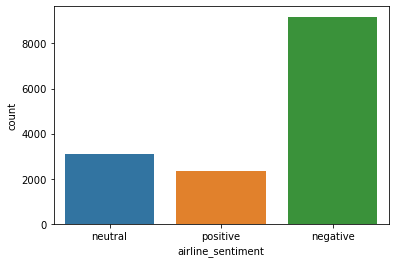

In [91]:
sns.countplot(data=df, x='airline_sentiment')

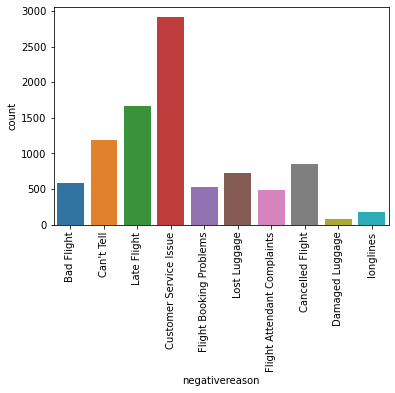

In [92]:
sns.countplot(data=df,x ='negativereason')
plt.xticks(rotation=90);

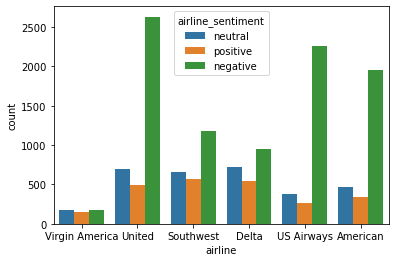

In [93]:
sns.countplot(data=df, x='airline',hue = 'airline_sentiment');

In [94]:
data = df[['airline_sentiment','text']]

In [95]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [96]:
X = data['text']

In [97]:
y=data['airline_sentiment']

### lets perform a train test split b4 we vectorize so that when we perform fit and transform we donot create any data leakage

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
tfidf =TfidfVectorizer(stop_words='english')

In [103]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [104]:
X_train_tfidf = tfidf.transform(X_train)

In [105]:
X_test_tfidf = tfidf.transform(X_test)